In [1]:
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [5]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df['target']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42 )

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
y_predKnn = knn.predict(X_test_scaled)

In [10]:
tes = accuracy_score(Y_test, y_predKnn)
tes

0.9111111111111111

## confusion matrix

In [11]:
con_mat = confusion_matrix(Y_test, y_predKnn)
con_mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  4, 11]])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

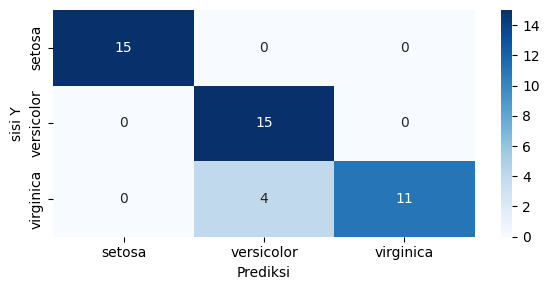

In [13]:
plt.figure(figsize=(6,3))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Prediksi')
plt.ylabel('sisi Y')
plt.tight_layout()
plt.show()

In [14]:
df_report_knn = pd.DataFrame(classification_report(Y_test, y_predKnn, output_dict=True)).transpose()
df_report_knn

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,15.000000
1,0.789474,1.000000,0.882353,15.000000
2,1.000000,0.733333,0.846154,15.000000
accuracy,0.911111,0.911111,0.911111,0.911111
macro avg,0.929825,0.911111,0.909502,45.000000
weighted avg,0.929825,0.911111,0.909502,45.000000
